In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')
SEED=31

In [2]:
#Setting the headings
iris = pd.read_csv('iris.data',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

### Basic Analysis and Visualization of the data

In [3]:
iris.head(4)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris['species']=iris.species.astype('category')

In [6]:
iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [7]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

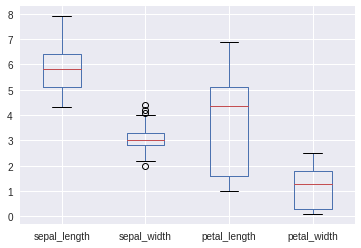

In [8]:
iris.plot(kind='box')
plt.show()

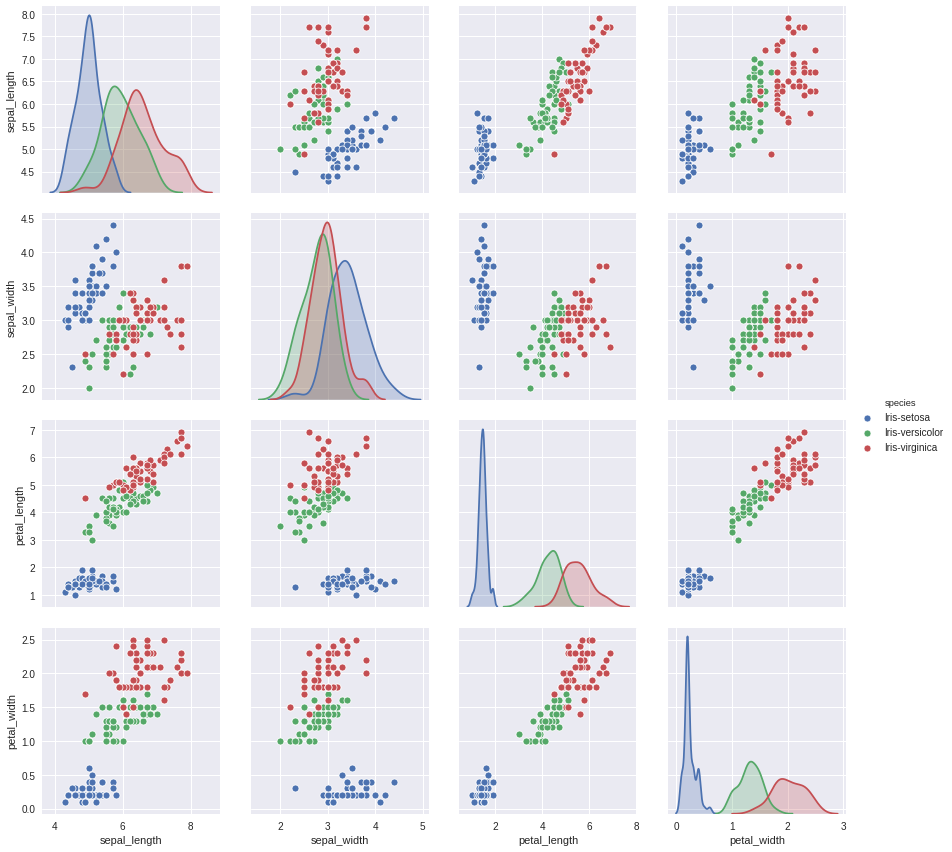

In [9]:
sns.pairplot(iris, hue="species", size=3)
plt.show()

### Setting up the data for training

In [10]:
iris = iris.sample(frac=1,random_state=SEED).reset_index(drop=True)

In [11]:
y = iris['species']
X = iris.drop('species',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=31)

In [14]:
print(X_train.head(2))
print(y_test.head(2))

    sepal_length  sepal_width  petal_length  petal_width
62           6.4          3.1           5.5          1.8
48           5.7          2.8           4.5          1.3
66     Iris-versicolor
132     Iris-virginica
Name: species, dtype: category
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]


### Let the classifiers do the work

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

In [20]:
lr = LogisticRegression(random_state=SEED)
dt = DecisionTreeClassifier(max_depth=3 , random_state=SEED)
knn = KNeighborsClassifier(n_neighbors=3)


clfs = [('Logistic Regression',lr),('DecisionTreeClassifier',dt),('KNeighborsClassifier',knn)]

In [23]:
for clf_name, clf in clfs:    
    clf.fit(X_train, y_train)    
       
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) 
   
#     print('{:s} : {:.2f}'.format(clf_name, accuracy))
    print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.85      1.00      0.92        17
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.

In [24]:
vc = VotingClassifier(estimators=clfs)     


vc.fit(X_train, y_train)   


y_pred = vc.predict(X_test)


accuracy = accuracy_score(y_test,y_pred)
print('Voting Classifier: {:.2f}'.format(accuracy))
print("classification report")
print(classification_report(y_test,y_pred))

Voting Classifier: 0.96
classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



96% Accuracy , pretty neat 